# Simple Linear Regression

## Part 0
Sratch Implementation

In [17]:
import pandas as pd

In [18]:
df = pd.read_csv("./simple_regression.csv")

In [19]:
df.head()

,X,Y
0,100,100000
1,200,200000
2,300,300000
3,400,400000
4,500,500000


In [23]:
upper = (len(df) * (df["Y"]*df["X"]).sum()) - (df["Y"].sum() * df["X"].sum())

In [24]:
lower = (len(df) * (df["X"]**2).sum()) - ((df["X"].sum())**2)

In [28]:
m = upper//lower
m

1000

In [29]:
c = df["Y"].mean() - m * df["X"].mean()

In [31]:
m , c

(1000, 0.0)

## Part 1
Using a custom data generator

In [1]:
# importing the required libraries
import sklearn as sk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./simple_regression.csv")

In [52]:
# data generator
for area in range(100,10000,100):
    price = area * 1000
    df.loc[len(df)] = [area,price]
df.to_csv("simple_regression.csv",index=False)

In [4]:
df.head()

,X,Y
0,100,100000
1,200,200000
2,300,300000
3,400,400000
4,500,500000


<AxesSubplot:xlabel='X', ylabel='Y'>

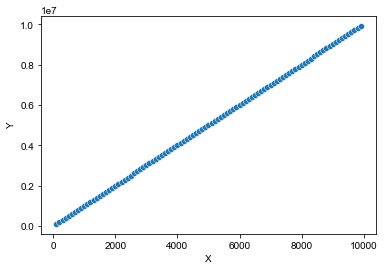

In [5]:
sns.scatterplot(x="X",y="Y",data=df)

In [6]:
from sklearn.model_selection import train_test_split
xTrain,xTest,yTrain,yTest = train_test_split(df["X"].values.reshape(-1,1),df["Y"],test_size=0.2)
# reshaping is necessary

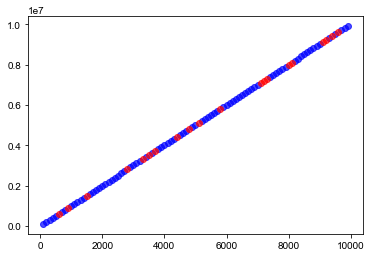

In [7]:
plt.scatter(xTrain,yTrain,c='b',alpha=.7)
plt.scatter(xTest,yTest,c='r',alpha=.7)
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [9]:
model.fit(xTrain,yTrain)

LinearRegression()

In [10]:
model.coef_, model.intercept_

(array([1000.]), 0.0)

In [11]:
ypred = model.predict(xTest)

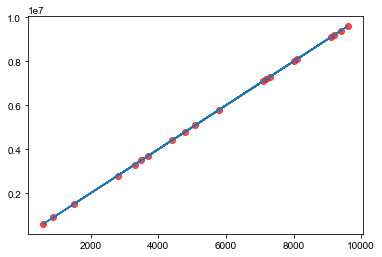

In [13]:
plt.plot(xTest,ypred)
plt.scatter(xTest,yTest,c='r',alpha=.7)
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
rmse = mean_squared_error(yTest,ypred)
r2 = r2_score(yTest,ypred)

In [18]:
int(rmse), int(r2)
# perfect model - as data is also fully linear

(0, 1)

## Part 2
Using make_regression() from sklearn

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_regression

In [16]:
X, Y = make_regression(n_samples=1000,n_features=1,noise=3.1)

In [17]:
X.shape

(1000, 1)

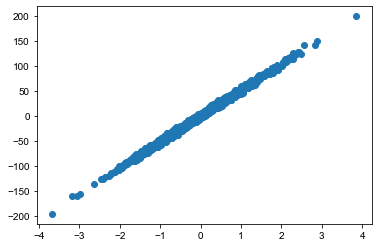

In [18]:
plt.scatter(X,Y)
plt.show()

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.33)

In [21]:
xTrain.shape, xTest.shape

((670, 1), (330, 1))

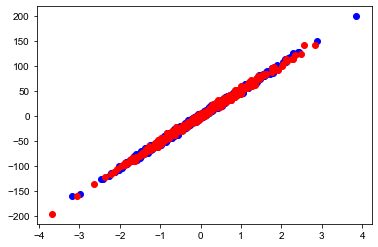

In [22]:
plt.scatter(xTrain,yTrain,c='b')
plt.scatter(xTest,yTest,c='r')
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()

In [25]:
model.fit(xTrain,yTrain)

LinearRegression()

In [26]:
yPred = model.predict(xTest) 

In [27]:
from sklearn.metrics import mean_squared_error, r2_score

In [28]:
rmse = mean_squared_error(y_true=yTest,y_pred=yPred)
r2 = r2_score(y_true=yTest,y_pred=yPred)

In [29]:
int(rmse), int(r2)

(11, 0)

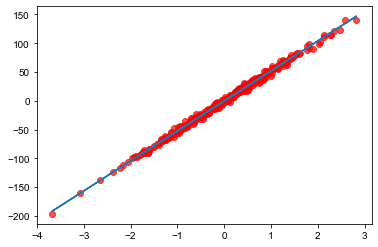

In [32]:
plt.plot(xTest,yPred)
plt.scatter(xTest,yTest,c='r',alpha=.7)
plt.show()

## Part 3 
K Fold Cross Validation

In [33]:
from sklearn.model_selection import KFold

In [34]:
kf = KFold(n_splits=10)

In [38]:
for train,test in kf.split(X):
    x_train, x_test = X[train],X[test]
    y_train, y_test = Y[train],Y[test]
    print(x_train.shape, x_test.shape)

(900, 1) (100, 1)
(900, 1) (100, 1)
(900, 1) (100, 1)
(900, 1) (100, 1)
(900, 1) (100, 1)
(900, 1) (100, 1)
(900, 1) (100, 1)
(900, 1) (100, 1)
(900, 1) (100, 1)
(900, 1) (100, 1)


In [46]:
preds = []

In [47]:
model = LinearRegression()
for train,test in kf.split(X):
    x_train, x_test = X[train],X[test]
    y_train, y_test = Y[train],Y[test]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    preds.append(mean_squared_error(y_true=y_test,y_pred=y_pred))

In [48]:
preds

[9.834304202692687,
 12.992469407277145,
 9.82243955752008,
 8.569096909000896,
 10.98608122037924,
 11.077382047065427,
 11.392315356508483,
 11.025447143013539,
 10.866166356079068,
 7.1026834072672225]

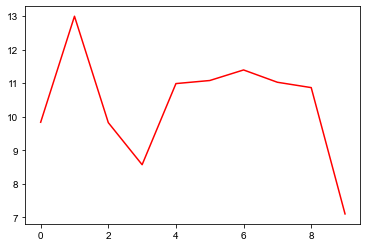

In [51]:
plt.plot(preds,c='r')
plt.show()

# Polynomial Linear Regression

In [10]:
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_csv("./poly_regression.csv")

In [7]:
# data generator
for x in range(1,1000+1):
    y = x ** 2
    df.loc[len(df)] = [x,y]
df.to_csv("poly_regression.csv",index=False)

In [16]:
df.head()

,X,Y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


<AxesSubplot:xlabel='X', ylabel='Y'>

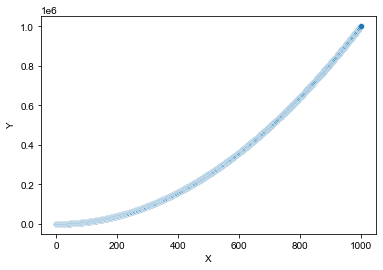

In [27]:
sns.scatterplot(data=df,x=df['X'],y=df['Y'])

In [11]:
from sklearn.preprocessing import PolynomialFeatures

In [19]:
polynomial = PolynomialFeatures(degree=2,include_bias=False)

In [20]:
polyFs = polynomial.fit_transform(df["X"].values.reshape(-1,1))

In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lmodel = LinearRegression()

In [30]:
lmodel.fit(polyFs,df["Y"])

LinearRegression()

In [31]:
ypred = lmodel.predict(polyFs)

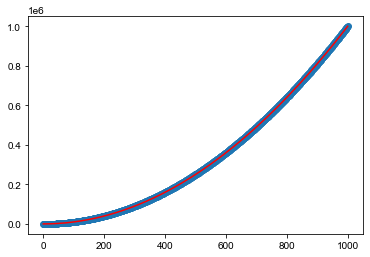

In [35]:
plt.plot(ypred,c='r')
plt.scatter(df['X'],df['Y'])

## Multiple Linear Regression

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import make_regression

In [4]:
X, Y = make_regression(n_samples=1000,n_features=3)

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y)

In [5]:
from sklearn.linear_model import LinearRegression

In [6]:
mlr = LinearRegression()

In [11]:
mlr.fit(xtrain,ytrain)

LinearRegression()

In [12]:
mlr.coef_

array([25.86652191, 94.22274335, 26.94904849])

In [14]:
int(mlr.intercept_)

0

In [15]:
ypred = mlr.predict(xtest)

In [16]:
mlr.score(xtest,ypred)

1.0